In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [7]:
Telecom=pd.read_csv("telecommunications_churn.csv")
Telecom


,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,1,36,156.2,215.5,279.1,9.9,2,0,77,26.55,126,18.32,83,12.56,6,2.67,60.10,0
3329,68,0,0,231.1,153.4,191.3,9.6,3,0,57,39.29,55,13.04,123,8.61,4,2.59,63.53,0
3330,28,0,0,180.8,288.8,191.9,14.1,2,0,109,30.74,58,24.55,91,8.64,6,3.81,67.74,0
3331,184,0,0,213.8,159.6,139.2,5.0,2,1,105,36.35,84,13.57,137,6.26,10,1.35,57.53,0


In [8]:
array=Telecom.values
X= array[:,0:17]
Y= array[:,18]

In [9]:
num_folds=10
kfold=KFold(n_splits=10)

In [10]:
model=KNeighborsClassifier(n_neighbors=17)
results=cross_val_score(model,X,Y,cv=kfold)

In [11]:
print(results.mean())

0.8784691877506248


# Grid Search for Algorithm Tuning

In [14]:
from sklearn.model_selection import GridSearchCV
import numpy

In [15]:
n_neighbors = numpy.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [16]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [17]:
print(grid.best_score_)
print(grid.best_params_)

0.8814871843357601
{'n_neighbors': 11}


# Visualizing the CV results

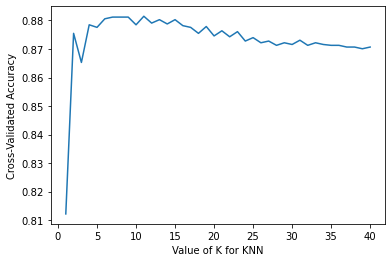

In [18]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()